In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn import metrics 

In [2]:
#Searches for all the txt files in the data folder 
path = r"/Users/alexanderberg/Documents/Kurser/GMI29F /Labs/lab3/Data"
all_files = glob.glob(path + "/*.txt") 

#Create empty list
li = []

#Loop through the diretory 
for filename in all_files:
    df = pd.read_csv(filename, encoding="1252", sep="\t")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.shape

(2614161, 19)

In [4]:
frame.dtypes

Posttyp                  object
Kvartalsslut             object
Institutnr_fondbolag    float64
Firma_fondbolag          object
Institutnr_fond           int64
Firma_fond               object
Marknadsvarde_tot        object
Fondformogenhet          object
Andelsvarde              object
Instrumentnamn           object
ISIN                     object
Land                     object
Antal_instr              object
Kurs_ranta               object
Valutakurs               object
Marknadsvarde            object
Onoterad                 object
Inlanad/Utlanad          object
Inlanad_Utlanad          object
dtype: object

In [5]:
#checking incompletness in data
frame[['Kvartalsslut','Firma_fondbolag','Firma_fond','Instrumentnamn','Marknadsvarde_tot','Land','Marknadsvarde']].isnull().sum()

Kvartalsslut         2595076
Firma_fondbolag      2595076
Firma_fond           2595076
Instrumentnamn         19256
Marknadsvarde_tot    2595076
Land                   19137
Marknadsvarde          19085
dtype: int64

In [6]:
# Selecting Fund 'Nordea Nordenfond' only
graph1 = frame[frame["Firma_fond"] == "Nordea Nordenfond"]
graph1

,Posttyp,Kvartalsslut,Institutnr_fondbolag,Firma_fondbolag,Institutnr_fond,Firma_fond,Marknadsvarde_tot,Fondformogenhet,Andelsvarde,Instrumentnamn,ISIN,Land,Antal_instr,Kurs_ranta,Valutakurs,Marknadsvarde,Onoterad,Inlanad/Utlanad,Inlanad_Utlanad
16163,info,2007-06-30,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,1.01691e+10,1.03951e+10,"817,1045",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71767,info,2013-06-30,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"5754084471,00","5804244046,00","595,823900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,
136755,info,2012-12-31,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"5873314980,00","5976168874,00","582,151100",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,
207121,info,2006-12-31,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,8.42805e+09,8.59671e+09,"676,6168",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252580,info,2015-06-30,57502.0,Nordea Funds Ab,51282,Nordea Nordenfond,"5720329241,00","5857132324,00","846,471300",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338995,info,2009-03-31,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"4486033281,00","4630428689,00","394,070600",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,
398735,info,2011-09-30,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"5796426490,00","5858988218,00","478,347500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,
456246,info,2014-12-31,57502.0,Nordea Funds Ab,51282,Nordea Nordenfond,"5569652209,00","5669647928,00","746,308400",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542725,info,2008-09-30,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"5641977800,00","5835972956,00","512,554800",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,
596556,info,2010-03-31,58052.0,Nordea Fonder Aktiebolag,51282,Nordea Nordenfond,"7514147792,00","7570317987,00","590,603300",NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,


In [7]:
#removing 'commas' in Marknadsvarde_tot colums and renaming it to Market Value
lst = []
for i in graph1["Marknadsvarde_tot"]:
    if type(i) == str:
        num = i.replace(",", ".")
        lst.append(num)
    else:
        lst.append(i)
graph1["Market Value"] = lst
graph1.drop("Marknadsvarde_tot", axis=1, inplace=True) 

In [8]:
#changin datatypes of market value and Kvartalsslut
graph1 = graph1.astype({"Market Value": float})
graph1["Kvartalsslut"] = pd.to_datetime(graph1["Kvartalsslut"])
graph1.dtypes

Posttyp                         object
Kvartalsslut            datetime64[ns]
Institutnr_fondbolag           float64
Firma_fondbolag                 object
Institutnr_fond                  int64
Firma_fond                      object
Fondformogenhet                 object
Andelsvarde                     object
Instrumentnamn                  object
ISIN                            object
Land                            object
Antal_instr                     object
Kurs_ranta                      object
Valutakurs                      object
Marknadsvarde                   object
Onoterad                        object
Inlanad/Utlanad                 object
Inlanad_Utlanad                 object
Market Value                   float64
dtype: object

In [9]:
graph1['Market Value']= graph1['Market Value'].div(1000000000)
graph1 = graph1.set_index(pd.DatetimeIndex(graph1["Kvartalsslut"]))
graph1 = graph1.sort_index()

In [10]:
#final frame for graph1
graph1=graph1[['Kvartalsslut','Market Value']].reset_index(drop=True)

In [11]:
#data for plot 1
graph1

,Kvartalsslut,Market Value
0,2006-03-31,7.896558
1,2006-06-30,6.983744
2,2006-09-30,7.306745
3,2006-12-31,8.428046
4,2007-03-31,9.298350
5,2007-06-30,10.169082
6,2007-09-30,9.815820
7,2007-12-31,8.655152
8,2008-03-31,7.376522
9,2008-06-30,6.892084


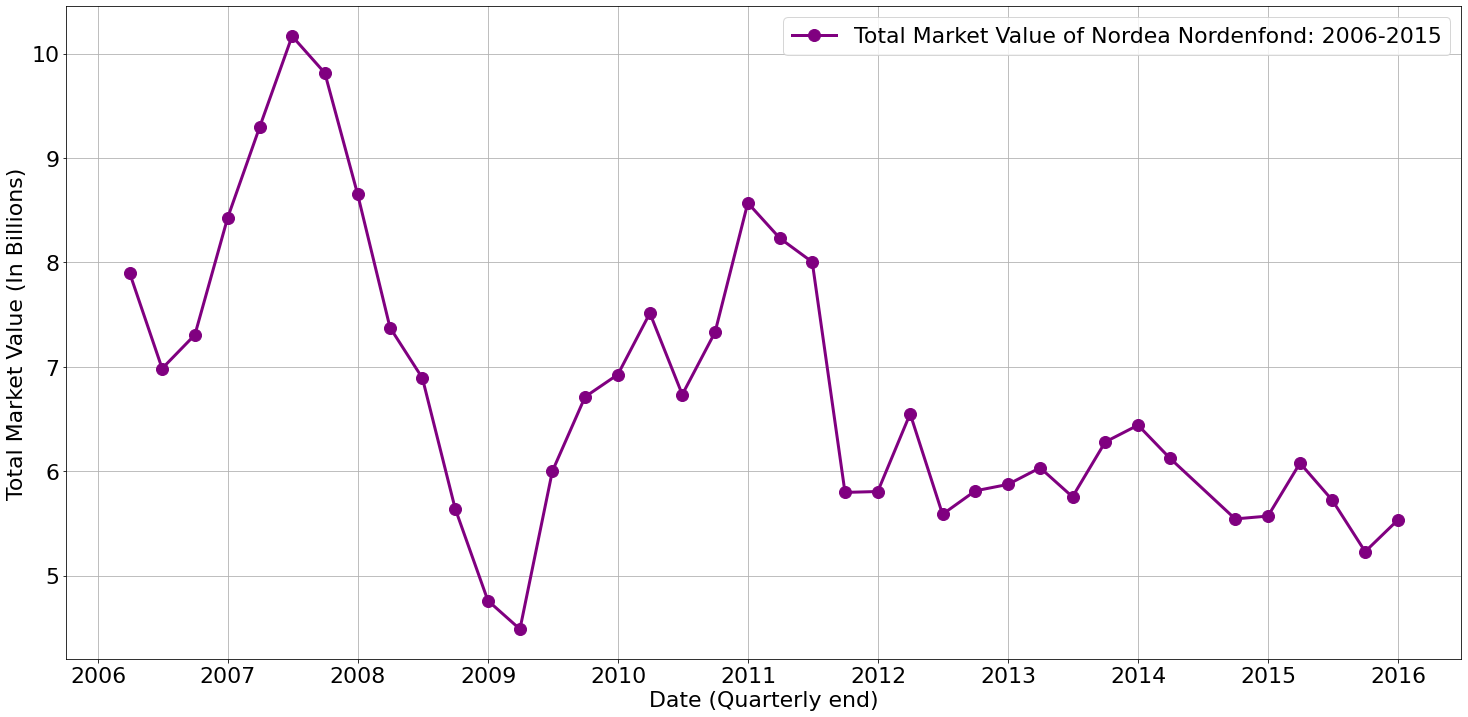

In [12]:
#Plotting graph1
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(25, 12))
plt.plot(graph1['Kvartalsslut'], graph1['Market Value'], label='Total Market Value of Nordea Nordenfond: 2006-2015',color='purple',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Date (Quarterly end)')
plt.ylabel('Total Market Value (In Billions)')
plt.grid()
plt.legend()
plt.show()

In [13]:
#selecting required columns
graph2=frame[["Kvartalsslut", "Firma_fond", "Land", "Marknadsvarde"]]

In [14]:
#checking incomplete columns
graph2.isnull().sum()

Kvartalsslut     2595076
Firma_fond       2595076
Land               19137
Marknadsvarde      19085
dtype: int64

In [15]:
#filling the Firma_fond and Kvartalsslut column with corresponding fund name and date
graph2["Firma_fond"].ffill(axis=0, inplace=True)
graph2["Kvartalsslut"].ffill(axis=0, inplace=True)

In [16]:
#checking incompletness in data after filling
graph2.isnull().sum()

Kvartalsslut         0
Firma_fond           0
Land             19137
Marknadsvarde    19085
dtype: int64

In [17]:
#drop the rows with nan values
graph2.dropna(inplace=True)

In [18]:
#checking incompletness again
graph2.isnull().sum()

Kvartalsslut     0
Firma_fond       0
Land             0
Marknadsvarde    0
dtype: int64

In [19]:
graph2

,Kvartalsslut,Firma_fond,Land,Marknadsvarde
1,2007-06-30,Aktie-Ansvar Sverige,SE,4.68e+06
2,2007-06-30,Aktie-Ansvar Sverige,SE,3.8808e+07
3,2007-06-30,Aktie-Ansvar Sverige,SE,2.50425e+07
4,2007-06-30,Aktie-Ansvar Sverige,SE,8.432e+06
5,2007-06-30,Aktie-Ansvar Sverige,SE,1.37655e+07
...,...,...,...,...
2614156,2013-03-31,AP7 Räntefond,SE,"897069427,00"
2614157,2013-03-31,AP7 Räntefond,SE,"749632229,00"
2614158,2013-03-31,AP7 Räntefond,SE,"610179130,00"
2614159,2013-03-31,AP7 Räntefond,SE,"595545607,00"


In [20]:
#removing 'commas' in Marknadsvarde colums and renaming it to Market Value
lst_2 = []
for i in graph2["Marknadsvarde"]:
    if type(i) == str:
        num = i.replace(",", ".")
        lst_2.append(num)
    else:
        lst_2.append(i)
graph2["Market Value"] = lst_2
graph2.drop("Marknadsvarde", axis=1, inplace=True)

graph2 = graph2.astype({"Market Value": float})
graph2["Kvartalsslut"] = pd.to_datetime(graph2["Kvartalsslut"])

In [21]:
#changin datatypes
graph2 = graph2.astype({"Market Value": float})
graph2["Kvartalsslut"] = pd.to_datetime(graph2["Kvartalsslut"])
graph2

,Kvartalsslut,Firma_fond,Land,Market Value
1,2007-06-30,Aktie-Ansvar Sverige,SE,4680000.0
2,2007-06-30,Aktie-Ansvar Sverige,SE,38808000.0
3,2007-06-30,Aktie-Ansvar Sverige,SE,25042500.0
4,2007-06-30,Aktie-Ansvar Sverige,SE,8432000.0
5,2007-06-30,Aktie-Ansvar Sverige,SE,13765500.0
...,...,...,...,...
2614156,2013-03-31,AP7 Räntefond,SE,897069427.0
2614157,2013-03-31,AP7 Räntefond,SE,749632229.0
2614158,2013-03-31,AP7 Räntefond,SE,610179130.0
2614159,2013-03-31,AP7 Räntefond,SE,595545607.0


In [22]:
graph2.shape

(2595024, 4)

In [23]:
graph2['Land'].value_counts()

US    685141
SE    654808
JP    231138
GB    154217
FR     91669
       ...  
NU         1
WI         1
RB         1
ZZ         1
NQ         1
Name: Land, Length: 254, dtype: int64

In [24]:
#converting in terms of billions
graph2['Market Value']=graph2['Market Value'].div(1000000000)

In [25]:
#making dataframe for Swedish companies only
graph2_SE=graph2[graph2['Land']=='SE']
graph2_SE.head()

,Kvartalsslut,Firma_fond,Land,Market Value
1,2007-06-30,Aktie-Ansvar Sverige,SE,0.004680
2,2007-06-30,Aktie-Ansvar Sverige,SE,0.038808
3,2007-06-30,Aktie-Ansvar Sverige,SE,0.025042
4,2007-06-30,Aktie-Ansvar Sverige,SE,0.008432
5,2007-06-30,Aktie-Ansvar Sverige,SE,0.013765


In [26]:
#making dataframe for all companies only
graph2_all=graph2
graph2_all.head()

,Kvartalsslut,Firma_fond,Land,Market Value
1,2007-06-30,Aktie-Ansvar Sverige,SE,0.004680
2,2007-06-30,Aktie-Ansvar Sverige,SE,0.038808
3,2007-06-30,Aktie-Ansvar Sverige,SE,0.025042
4,2007-06-30,Aktie-Ansvar Sverige,SE,0.008432
5,2007-06-30,Aktie-Ansvar Sverige,SE,0.013765


In [27]:
#collecting data of Nordea Nordenfond
graph2_SE=graph2_SE[graph2_SE["Firma_fond"] == "Nordea Nordenfond"]

In [36]:
#grouping on same dates
graph2_SE=graph2_SE.groupby('Kvartalsslut')['Market Value'].sum().to_frame().reset_index()
graph2_SE.head()

,Kvartalsslut,Market Value
0,2006-03-31,3.278645
1,2006-06-30,2.807902
2,2006-09-30,3.008326
3,2006-12-31,3.576370
4,2007-03-31,3.904468


In [37]:
#grouping on dates
graph2_all=graph2_all.groupby('Kvartalsslut')['Market Value'].sum().to_frame().reset_index()
graph2_all.head()

,Kvartalsslut,Market Value
0,2006-03-31,1084.339869
1,2006-06-30,1003.080703
2,2006-09-30,1101.541225
3,2006-12-31,1145.012567
4,2007-03-31,1191.471860


In [38]:
#getting percentage of market value of swedish companies out of all
percentage=(graph2_SE['Market Value']/graph2_all['Market Value'])*100

final_graph2=pd.DataFrame()
final_graph2['Kvartalsslut']=graph2_all['Kvartalsslut']
final_graph2['percentage_value']=percentage

In [39]:
final_graph2

,Kvartalsslut,percentage_value
0,2006-03-31,0.302363
1,2006-06-30,0.279928
2,2006-09-30,0.273102
3,2006-12-31,0.312343
4,2007-03-31,0.327701
5,2007-06-30,0.333535
6,2007-09-30,0.326656
7,2007-12-31,0.304730
8,2008-03-31,0.341270
9,2008-06-30,0.305061


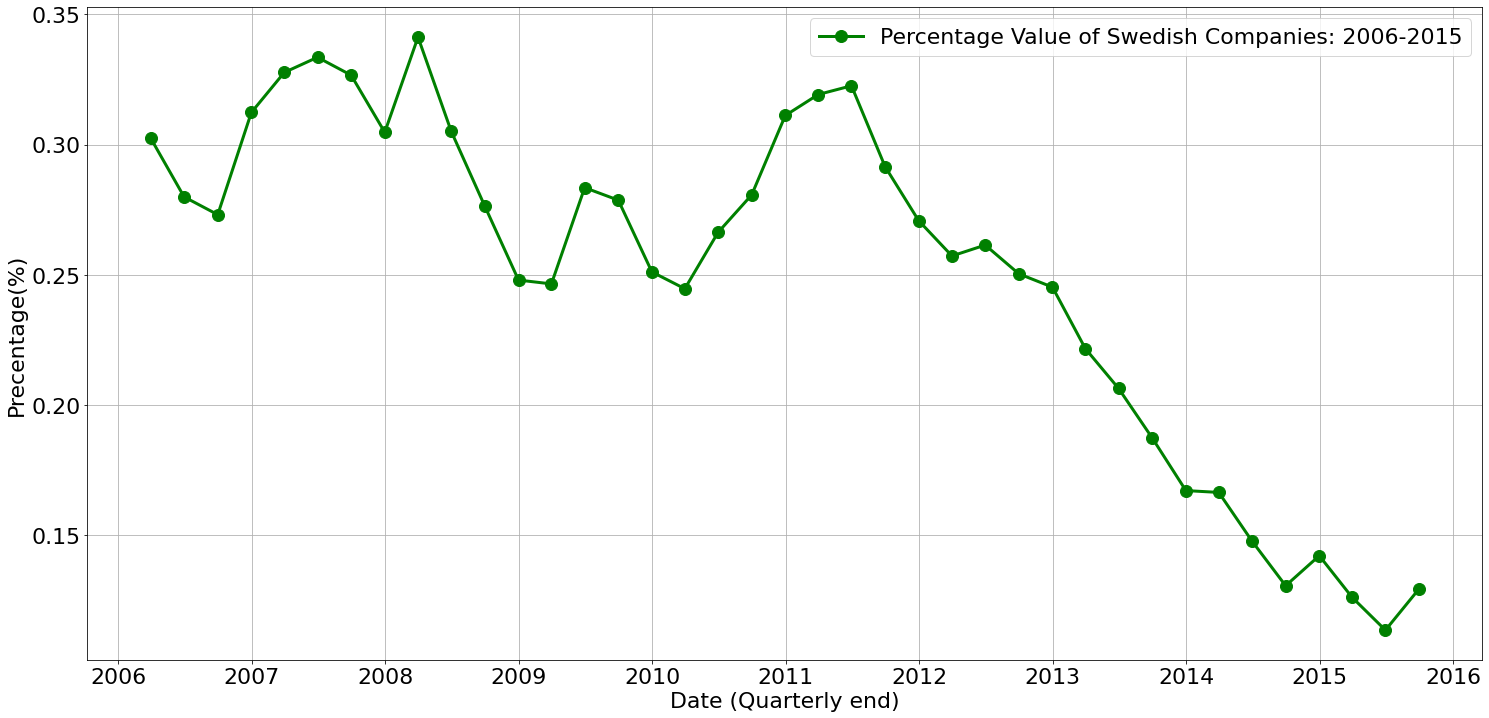

In [40]:
#plotting graph2
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(25, 12))
plt.plot(final_graph2['Kvartalsslut'], final_graph2['percentage_value'], label='Percentage Value of Swedish Companies: 2006-2015',color='g',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Date (Quarterly end)')
plt.ylabel('Precentage(%)')
plt.grid()
plt.legend()
plt.show()

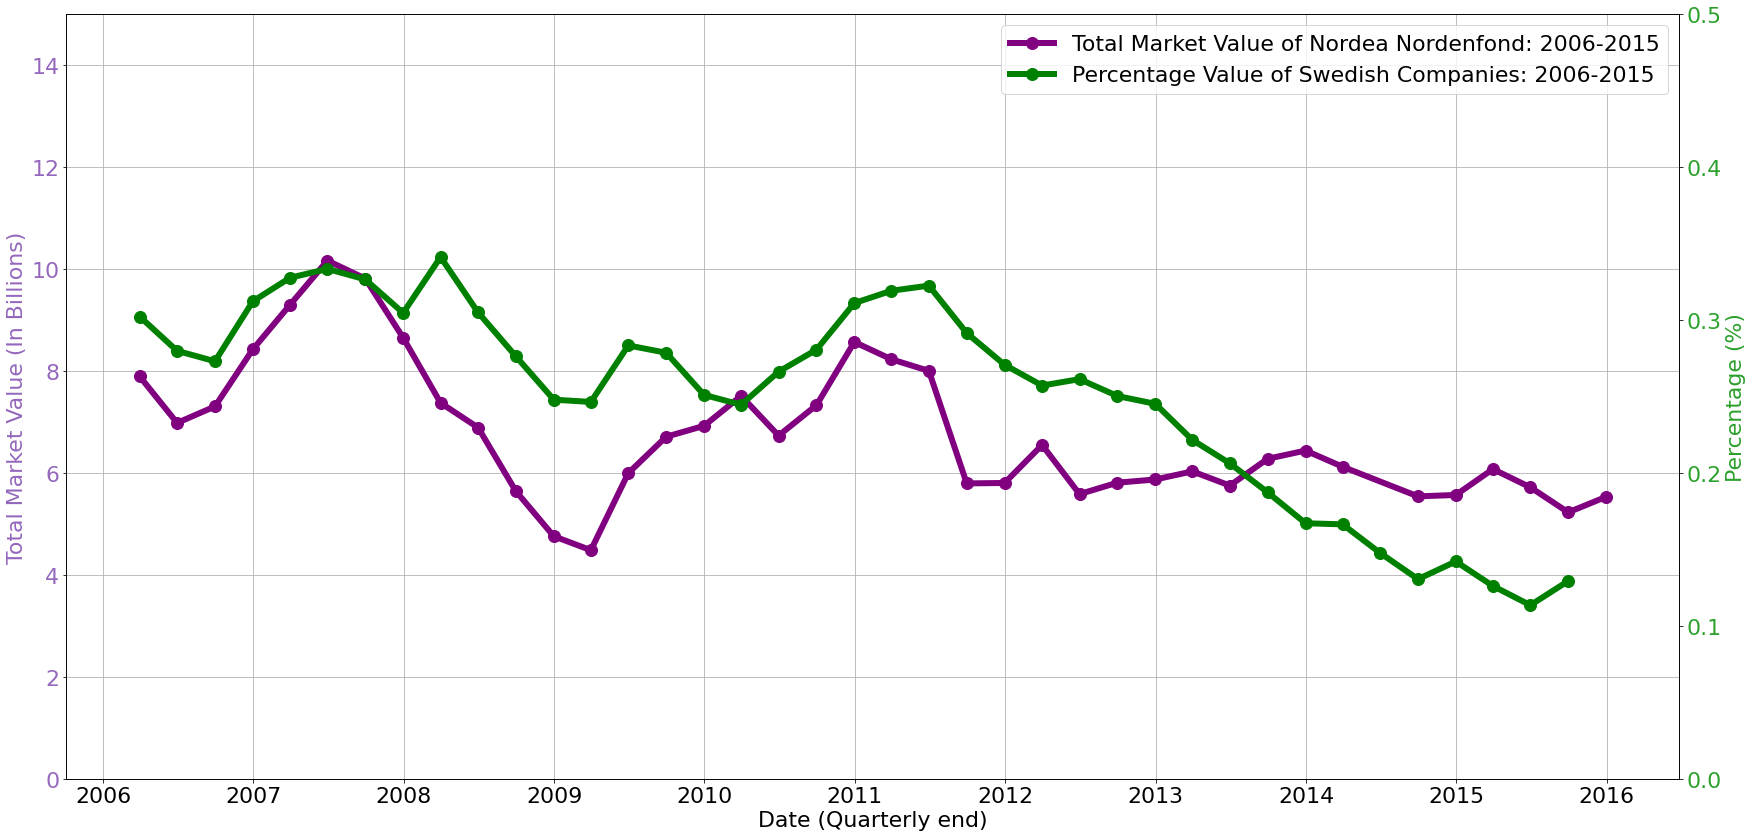

In [41]:
fig, ax1 = plt.subplots(figsize=(25, 12))

ax2 = ax1.twinx() 

#plot1
color = 'tab:purple'
ax1.set_xlabel('Date (Quarterly end)')
ax1.set_ylabel('Total Market Value (In Billions)', color=color)
lns1=ax1.plot(graph1['Kvartalsslut'], graph1['Market Value'], label='Total Market Value of Nordea Nordenfond: 2006-2015',color='purple',marker='o',linewidth=6.0,markersize=12)
ax1.tick_params(axis='y', labelcolor=color) 

#plot2
color = 'tab:green'
ax2.set_ylabel('Percentage (%)', color=color)  # we already handled the x-label with ax1
lns2=ax2.plot(final_graph2['Kvartalsslut'], final_graph2['percentage_value'], label='Percentage Value of Swedish Companies: 2006-2015',color='g',marker='o',linewidth=6.0,markersize=12)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
ax1.grid()

#for setting legend
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)

#x and y limits
ax1.set_ylim([0, 15])
ax2.set_ylim([0, 0.5])

plt.show()